### Using the dataset to train a model

In [2]:
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr

In [3]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [4]:
data = pd.read_csv('power_production.csv')
data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


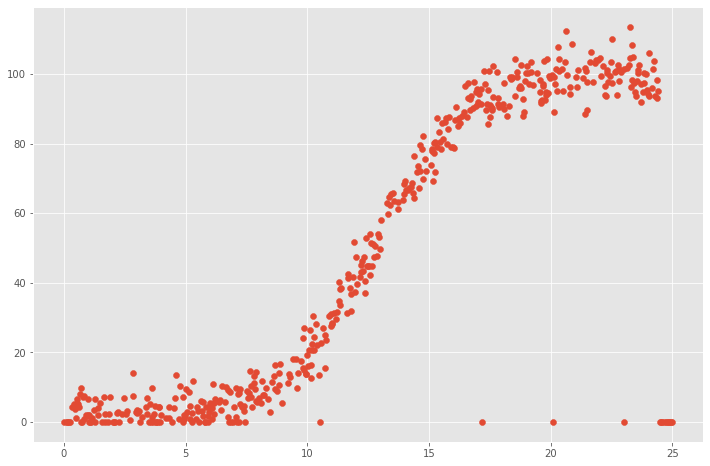

In [5]:
power_data = np.genfromtxt("power_production.csv", delimiter=",", names=["x", "y"])
fig=plt.figure(figsize=(12,8))  # adapted from https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.scatter(power_data['x'], power_data['y'])


The curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches a maximum. The characteristic shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity) on how windmills create energy. It seems that if the turbine is moving quite slowly, electricity is not creatyed. Energy starts to be created at what is known as the cut-in speed/ After the cut-in point energy is created at a fast rate but this rate starts to slow until it reaches its maximum rated wins speed. SAbove this point, the power output remains constant. We can see this as the top of the s-shape in the graph. Wind turbines also have a cut-out speed, at which a brake stops the winds rotation. I wonder if some of the zero value power outputs we see can be explained by problems caused by high wind speed.
[https://now.tufts.edu/articles/how-do-windmills-create-electricity]

## S-shaped curves

I'm struck by the shape of the curve produce by the relationship between wind speed and power output, the related sigmoid function and the mechanism of firing neurons as described in the lectures on neural networks. The way that neurons need a build up of signals before firing strikes me as similar to the way the wind turbines have a cut-in speed, after which they start to produce electricity. The sigmoid function is described in the lectures as like an on/off switch. Is there a relationship between the activation function and thr function needed to describe the power output from wind turbines?
[https://en.wikipedia.org/wiki/Sigmoid_function]

In [6]:
train = pd.DataFrame()
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
train_x = train.iloc[:,0]
train_x
train_y = train.iloc[:,1]
train_y
test_x = test.iloc[:,0]
test_x
test_y = test.iloc[:,1]
test_y
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

2        0.000
3        0.000
5        4.331
10       6.498
16       0.000
        ...   
469     98.066
471    100.311
483     95.869
497      0.000
498      0.000
Name: power, Length: 103, dtype: float64

In [13]:
# Train a model.
m = kr.models.Sequential()
m.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [16]:
# Fit the data.
m.fit(train_x, train_y, epochs=700, batch_size=10)

Epoch 1/700
40/40 [==============================] - 0s 1ms/step - loss: 247.3806
Epoch 2/700
40/40 [==============================] - 0s 1ms/step - loss: 247.1487
Epoch 3/700
40/40 [==============================] - 0s 1ms/step - loss: 247.0151
Epoch 4/700
40/40 [==============================] - 0s 1ms/step - loss: 246.8414
Epoch 5/700
40/40 [==============================] - 0s 1ms/step - loss: 246.8358
Epoch 6/700
40/40 [==============================] - 0s 1ms/step - loss: 247.0202
Epoch 7/700
40/40 [==============================] - 0s 1ms/step - loss: 247.0199
Epoch 8/700
40/40 [==============================] - 0s 1ms/step - loss: 246.7559
Epoch 9/700
40/40 [==============================] - 0s 1ms/step - loss: 246.9494
Epoch 10/700
40/40 [==============================] - 0s 1ms/step - loss: 247.2215
Epoch 11/700
40/40 [==============================] - 0s 1ms/step - loss: 246.5940
Epoch 12/700
40/40 [==============================] - 0s 1ms/step - loss: 246.8226
Epoch 13/700


40/40 [==============================] - 0s 1ms/step - loss: 244.5096
Epoch 100/700
40/40 [==============================] - 0s 1ms/step - loss: 244.3266
Epoch 101/700
40/40 [==============================] - 0s 1ms/step - loss: 244.2332
Epoch 102/700
40/40 [==============================] - 0s 1ms/step - loss: 244.2903
Epoch 103/700
40/40 [==============================] - 0s 1ms/step - loss: 244.3575
Epoch 104/700
40/40 [==============================] - 0s 1ms/step - loss: 244.3530
Epoch 105/700
40/40 [==============================] - 0s 1ms/step - loss: 244.3849
Epoch 106/700
40/40 [==============================] - 0s 1ms/step - loss: 244.8045
Epoch 107/700
40/40 [==============================] - 0s 1ms/step - loss: 244.4296
Epoch 108/700
40/40 [==============================] - 0s 1ms/step - loss: 244.2946
Epoch 109/700
40/40 [==============================] - 0s 1ms/step - loss: 244.1033
Epoch 110/700
40/40 [==============================] - 0s 1ms/step - loss: 244.1522
Epoch 

40/40 [==============================] - 0s 1ms/step - loss: 243.0348
Epoch 197/700
40/40 [==============================] - 0s 1ms/step - loss: 243.2411
Epoch 198/700
40/40 [==============================] - 0s 1ms/step - loss: 243.0212
Epoch 199/700
40/40 [==============================] - 0s 1ms/step - loss: 243.0966
Epoch 200/700
40/40 [==============================] - 0s 1ms/step - loss: 242.9660
Epoch 201/700
40/40 [==============================] - 0s 1ms/step - loss: 242.9645
Epoch 202/700
40/40 [==============================] - 0s 1ms/step - loss: 243.0856
Epoch 203/700
40/40 [==============================] - 0s 1ms/step - loss: 242.8486
Epoch 204/700
40/40 [==============================] - 0s 1ms/step - loss: 243.2390
Epoch 205/700
40/40 [==============================] - 0s 2ms/step - loss: 242.8911
Epoch 206/700
40/40 [==============================] - 0s 1ms/step - loss: 243.1580
Epoch 207/700
40/40 [==============================] - 0s 1ms/step - loss: 242.8990
Epoch 

40/40 [==============================] - 0s 1ms/step - loss: 241.9173
Epoch 294/700
40/40 [==============================] - 0s 1ms/step - loss: 242.0266
Epoch 295/700
40/40 [==============================] - 0s 1ms/step - loss: 242.0650
Epoch 296/700
40/40 [==============================] - 0s 1ms/step - loss: 242.1017
Epoch 297/700
40/40 [==============================] - 0s 1ms/step - loss: 242.1267
Epoch 298/700
40/40 [==============================] - 0s 1ms/step - loss: 242.1532
Epoch 299/700
40/40 [==============================] - 0s 1ms/step - loss: 241.9797
Epoch 300/700
40/40 [==============================] - 0s 1ms/step - loss: 241.8743
Epoch 301/700
40/40 [==============================] - 0s 1ms/step - loss: 241.9305
Epoch 302/700
40/40 [==============================] - 0s 1ms/step - loss: 241.9465
Epoch 303/700
40/40 [==============================] - 0s 1ms/step - loss: 241.8206
Epoch 304/700
40/40 [==============================] - 0s 1ms/step - loss: 241.9805
Epoch 

40/40 [==============================] - 0s 1ms/step - loss: 241.3112
Epoch 391/700
40/40 [==============================] - 0s 1ms/step - loss: 241.5092
Epoch 392/700
40/40 [==============================] - 0s 1ms/step - loss: 241.1968
Epoch 393/700
40/40 [==============================] - 0s 1ms/step - loss: 241.3697
Epoch 394/700
40/40 [==============================] - 0s 1ms/step - loss: 241.1305
Epoch 395/700
40/40 [==============================] - 0s 1ms/step - loss: 241.2697
Epoch 396/700
40/40 [==============================] - 0s 2ms/step - loss: 241.0667
Epoch 397/700
40/40 [==============================] - 0s 1ms/step - loss: 241.3625
Epoch 398/700
40/40 [==============================] - 0s 1ms/step - loss: 241.3186
Epoch 399/700
40/40 [==============================] - 0s 1ms/step - loss: 241.2488
Epoch 400/700
40/40 [==============================] - 0s 1ms/step - loss: 241.7311
Epoch 401/700
40/40 [==============================] - 0s 1ms/step - loss: 241.1789
Epoch 

40/40 [==============================] - 0s 1ms/step - loss: 240.5881
Epoch 488/700
40/40 [==============================] - 0s 1ms/step - loss: 240.8168
Epoch 489/700
40/40 [==============================] - 0s 1ms/step - loss: 240.9451
Epoch 490/700
40/40 [==============================] - 0s 1ms/step - loss: 240.4893
Epoch 491/700
40/40 [==============================] - 0s 1ms/step - loss: 240.6459
Epoch 492/700
40/40 [==============================] - 0s 1ms/step - loss: 240.5315
Epoch 493/700
40/40 [==============================] - 0s 1ms/step - loss: 240.8504
Epoch 494/700
40/40 [==============================] - 0s 1ms/step - loss: 241.0359
Epoch 495/700
40/40 [==============================] - 0s 1ms/step - loss: 240.3463
Epoch 496/700
40/40 [==============================] - 0s 1ms/step - loss: 240.6990
Epoch 497/700
40/40 [==============================] - 0s 1ms/step - loss: 240.4016
Epoch 498/700
40/40 [==============================] - 0s 1ms/step - loss: 240.7099
Epoch 

40/40 [==============================] - 0s 1ms/step - loss: 240.3544
Epoch 585/700
40/40 [==============================] - 0s 1ms/step - loss: 240.2951
Epoch 586/700
40/40 [==============================] - 0s 1ms/step - loss: 239.9978
Epoch 587/700
40/40 [==============================] - 0s 1ms/step - loss: 239.9638
Epoch 588/700
40/40 [==============================] - 0s 1ms/step - loss: 240.0054
Epoch 589/700
40/40 [==============================] - 0s 1ms/step - loss: 240.2044
Epoch 590/700
40/40 [==============================] - 0s 2ms/step - loss: 239.8593
Epoch 591/700
40/40 [==============================] - 0s 1ms/step - loss: 240.1844
Epoch 592/700
40/40 [==============================] - 0s 1ms/step - loss: 239.9873
Epoch 593/700
40/40 [==============================] - 0s 1ms/step - loss: 240.7495
Epoch 594/700
40/40 [==============================] - 0s 1ms/step - loss: 240.3502
Epoch 595/700
40/40 [==============================] - 0s 1ms/step - loss: 239.8338
Epoch 

40/40 [==============================] - 0s 1ms/step - loss: 239.1927
Epoch 682/700
40/40 [==============================] - 0s 1ms/step - loss: 239.9626
Epoch 683/700
40/40 [==============================] - 0s 1ms/step - loss: 239.4823
Epoch 684/700
40/40 [==============================] - 0s 1ms/step - loss: 239.1841
Epoch 685/700
40/40 [==============================] - 0s 1ms/step - loss: 239.3475
Epoch 686/700
40/40 [==============================] - 0s 1ms/step - loss: 239.3279
Epoch 687/700
40/40 [==============================] - 0s 1ms/step - loss: 239.1715
Epoch 688/700
40/40 [==============================] - 0s 1ms/step - loss: 239.4268
Epoch 689/700
40/40 [==============================] - 0s 1ms/step - loss: 239.4272
Epoch 690/700
40/40 [==============================] - 0s 1ms/step - loss: 239.6810
Epoch 691/700
40/40 [==============================] - 0s 1ms/step - loss: 239.3514
Epoch 692/700
40/40 [==============================] - 0s 1ms/step - loss: 239.2900
Epoch 

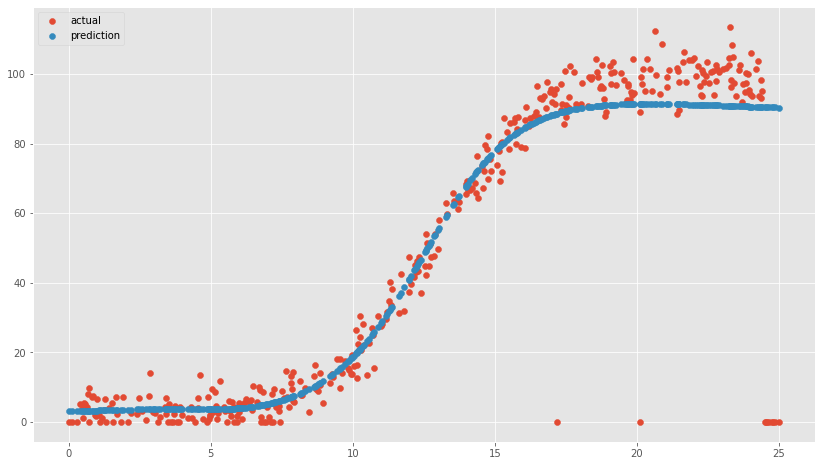

In [17]:
# Now let's see.
plt.scatter(train_x, train_y, label='actual')
plt.scatter(train_x, m.predict(train_x), label='prediction')
plt.legend();

In [6]:
# create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# dense: everything in current layer connected to every thing in previous layer
# 1: number of neurons in the layer
# input_dim=1  number of dimensions in input is 1 (1 input)
# linear activation function
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
# bog standard to optimize - optimizer="sgd"
# loss="mean_squared_error" ... cost function
m.compile(loss="mean_squared_error", optimizer="sgd")

In [7]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [8]:
# Have a look at x.
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [9]:
y

array([[-10.],
       [ -9.],
       [ -8.],
       [ -7.],
       [ -6.],
       [ -5.],
       [ -4.],
       [ -3.],
       [ -2.],
       [ -1.],
       [  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)